In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)


(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)
for i in range(20):
    print(Y_train[i])

(9000, 32, 32, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


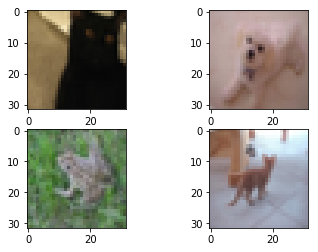

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 512
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer 
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
       
    model.add(Flatten())
    
   
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update yo

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 24.2777 - acc: 0.3736 - val_loss: 19.4312 - val_acc: 0.4873
Epoch 2/100
 - 2s - loss: 14.9263 - acc: 0.5596 - val_loss: 10.9426 - val_acc: 0.5723
Epoch 3/100
 - 2s - loss: 8.2683 - acc: 0.6307 - val_loss: 6.2454 - val_acc: 0.6037
Epoch 4/100
 - 2s - loss: 5.0934 - acc: 0.6483 - val_loss: 4.3078 - val_acc: 0.6027
Epoch 5/100
 - 2s - loss: 3.6240 - acc: 0.6620 - val_loss: 3.3753 - val_acc: 0.5920
Epoch 6/100
 - 2s - loss: 2.8943 - acc: 0.6898 - val_loss: 2.8612 - val_acc: 0.5737
Epoch 7/100
 - 2s - loss: 2.5217 - acc: 0.6951 - val_loss: 2.7463 - val_acc: 0.6373
Epoch 8/100
 - 2s - loss: 2.2159 - acc: 0.7256 - val_loss: 2.3568 - val_acc: 0.6007
Epoch 9/100
 - 2s - loss: 2.0787 - acc: 0.7381 - val_loss: 2.4504 - val_acc: 0.5920
Epoch 10/100
 - 2s - loss: 2.1119 - acc: 0.7400 - val_loss: 2.3250 - val_acc: 0.6037
Epoch 11/100
 - 2s - loss: 2.0657 - acc: 0.7618 - val_loss: 2.4985 - val_acc: 0.6193
Epoch 12/100
 - 2s - 

Epoch 97/100
 - 2s - loss: 0.6065 - acc: 0.9707 - val_loss: 1.6507 - val_acc: 0.7117
Epoch 98/100
 - 2s - loss: 0.6300 - acc: 0.9688 - val_loss: 2.2203 - val_acc: 0.6623
Epoch 99/100
 - 2s - loss: 0.6367 - acc: 0.9691 - val_loss: 1.8761 - val_acc: 0.7057
Epoch 100/100
 - 2s - loss: 0.6186 - acc: 0.9679 - val_loss: 1.8250 - val_acc: 0.7047
3000/3000 [==============================] - 1s 172us/step

Test Accuracy: 0.7907


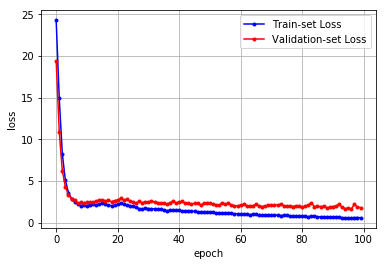

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 24.5086 - acc: 0.3767 - val_loss: 20.8795 - val_acc: 0.4263
Epoch 2/100
 - 2s - loss: 15.8109 - acc: 0.5770 - val_loss: 11.4837 - val_acc: 0.6137
Epoch 3/100
 - 2s - loss: 9.0769 - acc: 0.6320 - val_loss: 6.6617 - val_acc: 0.5980
Epoch 4/100
 - 2s - loss: 5.4464 - acc: 0.6603 - val_loss: 4.5301 - val_acc: 0.5787
Epoch 5/100
 - 2s - loss: 3.7760 - acc: 0.6810 - val_loss: 3.5253 - val_acc: 0.5690
Epoch 6/100
 - 2s - loss: 2.9453 - acc: 0.6964 - val_loss: 2.9134 - val_acc: 0.6063
Epoch 7/100
 - 2s - loss: 2.5742 - acc: 0.7098 - val_loss: 3.0110 - val_acc: 0.5253
Epoch 8/100
 - 2s - loss: 2.3929 - acc: 0.7118 - val_loss: 2.4762 - val_acc: 0.6357
Epoch 9/100
 - 2s - loss: 2.1886 - acc: 0.7303 - val_loss: 2.3872 - val_acc: 0.6190
Epoch 10/100
 - 2s - loss: 2.0891 - acc: 0.7427 - val_loss: 2.3548 - val_acc: 0.6090
Epoch 11/100
 - 2s - loss: 2.0620 - acc: 0.7576 - val_loss: 2.4595 - val_acc: 0.6493
Epoch 12/100
 - 2s - 

Epoch 97/100
 - 2s - loss: 0.6475 - acc: 0.9683 - val_loss: 1.7859 - val_acc: 0.6923
Epoch 98/100
 - 2s - loss: 0.6412 - acc: 0.9674 - val_loss: 1.8810 - val_acc: 0.6723
Epoch 99/100
 - 2s - loss: 0.6658 - acc: 0.9638 - val_loss: 1.9131 - val_acc: 0.7010
Epoch 100/100
 - 2s - loss: 0.6574 - acc: 0.9693 - val_loss: 2.0847 - val_acc: 0.6790
3000/3000 [==============================] - 0s 159us/step

Test Accuracy: 0.7467


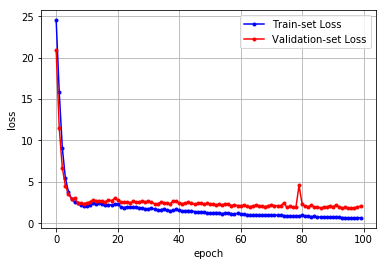

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 24.5074 - acc: 0.3822 - val_loss: 19.8095 - val_acc: 0.5663
Epoch 2/100
 - 2s - loss: 15.7977 - acc: 0.5868 - val_loss: 11.6020 - val_acc: 0.5820
Epoch 3/100
 - 2s - loss: 9.0546 - acc: 0.6437 - val_loss: 7.1875 - val_acc: 0.4877
Epoch 4/100
 - 2s - loss: 5.4226 - acc: 0.6639 - val_loss: 4.7522 - val_acc: 0.5463
Epoch 5/100
 - 2s - loss: 3.7974 - acc: 0.6834 - val_loss: 3.5377 - val_acc: 0.5550
Epoch 6/100
 - 2s - loss: 3.0461 - acc: 0.6918 - val_loss: 3.1456 - val_acc: 0.5327
Epoch 7/100
 - 2s - loss: 2.6612 - acc: 0.7129 - val_loss: 3.1106 - val_acc: 0.5397
Epoch 8/100
 - 2s - loss: 2.3226 - acc: 0.7339 - val_loss: 2.3880 - val_acc: 0.6267
Epoch 9/100
 - 2s - loss: 2.1983 - acc: 0.7424 - val_loss: 2.5573 - val_acc: 0.5667
Epoch 10/100
 - 2s - loss: 2.2381 - acc: 0.7471 - val_loss: 2.5734 - val_acc: 0.5980
Epoch 11/100
 - 2s - loss: 2.1828 - acc: 0.7679 - val_loss: 2.4847 - val_acc: 0.5943
Epoch 12/100
 - 2s - 

Epoch 97/100
 - 2s - loss: 0.6677 - acc: 0.9698 - val_loss: 1.9894 - val_acc: 0.6797
Epoch 98/100
 - 2s - loss: 0.6642 - acc: 0.9678 - val_loss: 1.8877 - val_acc: 0.6823
Epoch 99/100
 - 2s - loss: 0.7055 - acc: 0.9670 - val_loss: 2.0172 - val_acc: 0.6903
Epoch 100/100
 - 2s - loss: 0.6481 - acc: 0.9736 - val_loss: 1.9904 - val_acc: 0.6853
3000/3000 [==============================] - 0s 162us/step

Test Accuracy: 0.7700


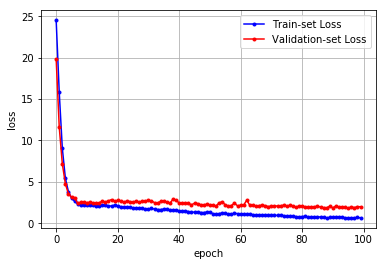

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 24.3263 - acc: 0.3650 - val_loss: 20.9457 - val_acc: 0.3890
Epoch 2/100
 - 2s - loss: 15.0348 - acc: 0.5692 - val_loss: 10.7432 - val_acc: 0.6200
Epoch 3/100
 - 2s - loss: 8.3402 - acc: 0.6299 - val_loss: 6.1092 - val_acc: 0.5927
Epoch 4/100
 - 2s - loss: 4.9991 - acc: 0.6661 - val_loss: 4.1099 - val_acc: 0.5880
Epoch 5/100
 - 2s - loss: 3.5582 - acc: 0.6767 - val_loss: 3.3922 - val_acc: 0.5370
Epoch 6/100
 - 2s - loss: 2.9442 - acc: 0.6933 - val_loss: 2.9937 - val_acc: 0.5913
Epoch 7/100
 - 2s - loss: 2.4896 - acc: 0.7228 - val_loss: 2.5033 - val_acc: 0.6187
Epoch 8/100
 - 2s - loss: 2.2928 - acc: 0.7348 - val_loss: 2.4982 - val_acc: 0.6230
Epoch 9/100
 - 2s - loss: 2.2242 - acc: 0.7416 - val_loss: 2.5504 - val_acc: 0.5683
Epoch 10/100
 - 2s - loss: 2.0835 - acc: 0.7498 - val_loss: 2.3498 - val_acc: 0.6067
Epoch 11/100
 - 2s - loss: 1.9442 - acc: 0.7739 - val_loss: 2.2471 - val_acc: 0.6260
Epoch 12/100
 - 2s - 

Epoch 97/100
 - 2s - loss: 0.6382 - acc: 0.9667 - val_loss: 1.7328 - val_acc: 0.6907
Epoch 98/100
 - 2s - loss: 0.6665 - acc: 0.9658 - val_loss: 1.7966 - val_acc: 0.6843
Epoch 99/100
 - 2s - loss: 0.6621 - acc: 0.9676 - val_loss: 1.8764 - val_acc: 0.7003
Epoch 100/100
 - 2s - loss: 0.6113 - acc: 0.9722 - val_loss: 1.8649 - val_acc: 0.6877
3000/3000 [==============================] - 1s 167us/step

Test Accuracy: 0.7780


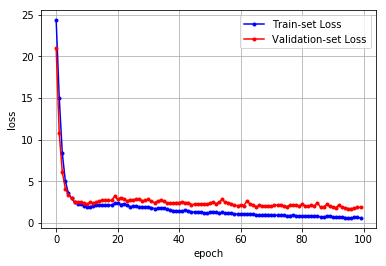

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 24.1495 - acc: 0.3831 - val_loss: 19.4596 - val_acc: 0.4850
Epoch 2/100
 - 2s - loss: 14.6317 - acc: 0.5753 - val_loss: 10.2072 - val_acc: 0.6153
Epoch 3/100
 - 2s - loss: 7.9516 - acc: 0.6380 - val_loss: 5.8015 - val_acc: 0.5977
Epoch 4/100
 - 2s - loss: 4.7611 - acc: 0.6636 - val_loss: 4.1297 - val_acc: 0.5420
Epoch 5/100
 - 2s - loss: 3.4159 - acc: 0.6730 - val_loss: 3.4362 - val_acc: 0.5347
Epoch 6/100
 - 2s - loss: 2.6974 - acc: 0.6878 - val_loss: 2.9643 - val_acc: 0.5427
Epoch 7/100
 - 2s - loss: 2.3018 - acc: 0.7152 - val_loss: 2.4119 - val_acc: 0.6403
Epoch 8/100
 - 2s - loss: 2.1700 - acc: 0.7266 - val_loss: 2.3937 - val_acc: 0.6173
Epoch 9/100
 - 2s - loss: 2.1274 - acc: 0.7308 - val_loss: 2.2994 - val_acc: 0.5993
Epoch 10/100
 - 2s - loss: 2.0388 - acc: 0.7508 - val_loss: 2.3981 - val_acc: 0.5853
Epoch 11/100
 - 2s - loss: 2.0596 - acc: 0.7544 - val_loss: 2.5178 - val_acc: 0.5980
Epoch 12/100
 - 2s - 

Epoch 97/100
 - 2s - loss: 0.6140 - acc: 0.9653 - val_loss: 1.8307 - val_acc: 0.6957
Epoch 98/100
 - 2s - loss: 0.5974 - acc: 0.9712 - val_loss: 1.8148 - val_acc: 0.7003
Epoch 99/100
 - 2s - loss: 0.5742 - acc: 0.9729 - val_loss: 1.9049 - val_acc: 0.6920
Epoch 100/100
 - 2s - loss: 0.6169 - acc: 0.9722 - val_loss: 1.9898 - val_acc: 0.6840
3000/3000 [==============================] - 0s 163us/step

Test Accuracy: 0.7563


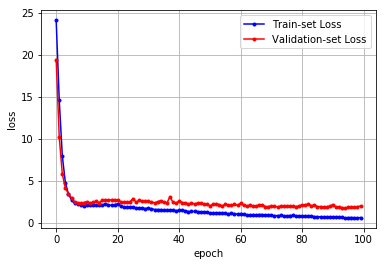

In [16]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_14/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=512, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [18]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_14/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.70 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99711111 0.99566667 0.99288889 0.99644444 0.99744444]
Validation Acc: [0.71166667 0.70366667 0.70033333 0.702      0.706     ]
Test Acc: [0.77633333 0.77133333 0.79233333 0.78533333 0.78066667]
[ True  True  True  True  True]


In [19]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_14/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 26.10%
Ensemble Validation_Accuracy: 73.90%
Ensemble Test_Error: 16.60%
Ensemble Test_Accuracy: 83.40%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_14/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])